# ML Zoomcamp Mid-Term Project 
### Travel Insurance Classification Model

The purpose of this model is to predict if a customer bought Travel Insurance Package during the introductory offering held 2019.

## Data Preparation

In [1]:
# import pyhton libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
# check size of dataframe
df.shape

(1987, 10)

In [4]:
# delete the Unnamed column 
del df['Unnamed: 0']

In [5]:
df.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


In [6]:
# statistical summary
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
# checking that there no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [8]:
# change fields name to small letters and replace white spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ','_')

# select all the categorical variables and make a list
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# loop through the list change the text to small letters and replace white spaces with underscore
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
# import sklearn library to split the dataset into train and test set
from sklearn.model_selection import train_test_split

In [10]:
# split data for train dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
# set the target to variables
y_train = df_train.travelinsurance.values
y_test = df_test.travelinsurance.values

In [12]:
# delete the churn field from the train and val dataset
del df_train['travelinsurance']
del df_test['travelinsurance']

## Exploratory Data Analysis

In [13]:
# number ofcustomers - 0 for does who didn't buy the travel insurance package while 1 for those who did
df.travelinsurance.value_counts()

0    1277
1     710
Name: travelinsurance, dtype: int64

In [14]:
# defining the average for the travel insurance
avg = df.travelinsurance.mean()
round(avg, 3)

0.357

In [15]:
# split the train dataset into categorical variable
categorical = list(df.dtypes[df.dtypes == 'object'].index)

# split the train dataset into numerical variable
numerical = ['age', 'annualincome', 'familymembers', 'chronicdiseases']

## Feature Importance

In [16]:
# import IPython display library
from IPython.display import display

In [17]:
# loof through the entire categorical dataset to determine the churn and risk rate
for col in categorical:
    df_group = df.groupby(by=col).travelinsurance.agg(['mean'])
    df_group['diff'] = df_group['mean'] - avg
    df_group['risk'] = (df_group['mean'] / avg) - 1
    display(df_group)

,mean,diff,risk
employment_type,,,
government_sector,0.245614,-0.111709,-0.312627
private_sector/self_employed,0.402258,0.044936,0.125757


,mean,diff,risk
graduateornot,,,
no,0.335593,-0.021729,-0.060812
yes,0.361111,0.003789,0.010603


,mean,diff,risk
frequentflyer,,,
no,0.300000,-0.057323,-0.160423
yes,0.573141,0.215819,0.603989


,mean,diff,risk
evertravelledabroad,,,
no,0.256378,-0.100944,-0.282502
yes,0.784211,0.426888,1.194685


## Feature Importance: Mutual Information

In [18]:
# import mutual info score library
from sklearn.metrics import mutual_info_score

In [19]:
# define function for categorical variables to determine feature importance
def calculate_mi(series):
    return mutual_info_score(series, df.travelinsurance)

df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MI')

display(df_mi.head())

,MI
evertravelledabroad,0.091751
frequentflyer,0.025983
employment_type,0.011351
graduateornot,0.000181


## Feature Importance: Correlation

In [20]:
# determine the correlation between numerical values and travelinsurance
df[numerical].corrwith(df.travelinsurance).to_frame('correlation')

,correlation
age,0.061060
annualincome,0.396763
familymembers,0.079909
chronicdiseases,0.018190


In [21]:
# group travelinsurance by the numerical values
df.groupby(by = 'travelinsurance')[numerical].mean()

,age,annualincome,familymembers,chronicdiseases
travelinsurance,,,,
0,29.517619,8.212999e+05,4.657009,0.271731
1,29.888732,1.133239e+06,4.925352,0.288732


## Building ML Models

In [22]:
# DictVectoriser for encoding and transforming categorical variables
from sklearn.feature_extraction import DictVectorizer

In [23]:
# merge cat and num dataset
columns = categorical + numerical
train_dicts = df_train[columns].to_dict(orient = 'records')
test_dicts = df_test[columns].to_dict(orient = 'records')

In [24]:
# assign the DictVectorizer to a variable
dv = DictVectorizer(sparse=False)

# fit the train set for transformation
X_train = dv.fit_transform(train_dicts)

# fit the validation set for transformation
X_test = dv.transform(test_dicts)

In [25]:
# import ml model algorithm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [26]:
dt = DecisionTreeClassifier()
# fit the features and taregt variables for training 
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
rf = RandomForestClassifier()
# fit the features and taregt variables for training 
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
xg = xgb.XGBClassifier()
# fit the features and taregt variables for training 
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [29]:
# making prediction with different algorithm
dt_pred = dt.predict(X_test)
tr_pred = rf.predict(X_test)
xg_pred = xg.predict(X_test)

## Model Evaluation
#### Confusion Matrix And Scores Of Accuracy, Recall, Precision And F1-Score

In [30]:
# import confusion matrix library
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, f1_score
import seaborn as sns

In [31]:
print(accuracy_score(y_test, dt_pred).round(3), precision_score(y_test, dt_pred).round(3),
      recall_score(y_test, dt_pred).round(3), f1_score(y_test, dt_pred).round(3))

print(accuracy_score(y_test, tr_pred).round(3), precision_score(y_test, tr_pred).round(3),
       recall_score(y_test, tr_pred).round(3), f1_score(y_test, tr_pred).round(3))

print(accuracy_score(y_test, xg_pred).round(3), precision_score(y_test, xg_pred).round(3),
       recall_score(y_test, xg_pred).round(3), f1_score(y_test,xg_pred).round(3))

print("\n")
print(confusion_matrix(y_test, xg_pred).round(3))
#true positive 848 and true negative 172
#false positive 59 and false negative 126

print(classification_report(y_test, xg_pred)) #shows all 

0.781 0.708 0.573 0.633
0.796 0.731 0.603 0.661
0.817 0.784 0.611 0.687


[[245  22]
 [ 51  80]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       267
           1       0.78      0.61      0.69       131

    accuracy                           0.82       398
   macro avg       0.81      0.76      0.78       398
weighted avg       0.81      0.82      0.81       398



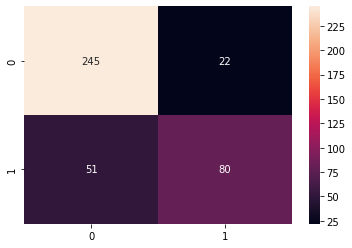

In [32]:
# plotting the confusion matrix
con = confusion_matrix(y_test, xg_pred).round(3)
sns.heatmap(con, annot = True, fmt = 'd');

In [33]:
# import metrics library
from sklearn import metrics

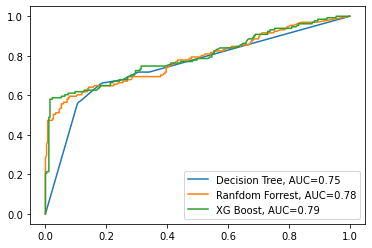

In [34]:
#set up plotting area
plt.figure(0).clf()

#fit decision tree model and plot ROC curve
y_pred = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit random forrest model and plot ROC curve
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Ranfdom Forrest, AUC="+str(auc))

#fit xgboost model and plot ROC curve
y_pred = xg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="XG Boost, AUC="+str(auc))


#add legend
plt.legend();

## Hyper-parameter Tuning

In [35]:
from sklearn.metrics import roc_auc_score

In [36]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [37]:
xgb_params = {
    'eta': 0.001, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': 10,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [38]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred).round(3)

0.831

## Save Model

In [39]:
# import BentoML
import bentoml

In [40]:
# save model
bentoml.xgboost.save_model(
    'travel_model',
    model,
    custom_objects={
        'dictVectorizer': dv
    },
    signatures={
        'predict':{
            'batchable':True,
            'batch_dim': 0,
        }
    }
)

Model(tag="travel_model:jezjljs64gtq4w4q", path="/home/nerd/bentoml/models/travel_model/jezjljs64gtq4w4q/")

In [41]:
customer = {
    'age': 26,
    'employment_type': 'government_sector',
    'graduateornot': 'no',
    'annualincome':200000 ,
    'familymembers': 4,
    'chronicdiseases': 1,
    'frequentflyer': 'yes',
    'evertravelledabroad': 'no'
}